# Homework 1. MNIST 데이터셋을 활용해 다중 분류 수행하기
### 과목코드: 2150085101
### 팀명: 4조
### 팀장: 20202995 장진영
### 팀원: 20201571 강현준
### 팀원: 20201601 이시호


#### 문제. 아래의 `코드`를 완성하고, 그에 대한 `분석`을 작성하시오.

### 1. (코드) MNIST 데이터셋 받기
   - (분석) 데이터셋에 대해 분석하기

In [ ]:
# 필요 라이브러리 import
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from collections import Counter

In [1]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target'].astype(np.uint8)

Data Shape / Type: (70000, 784) / <class 'numpy.ndarray'>
Target Shape / Type: (70000,) / <class 'numpy.ndarray'>


<h1>MNIST Dataset 분석 </h1>

70000개의 이미지 데이터가 있으며 target은 0부터 9까지의 값으로 구성되어 있다.<br>

이미지는 28 * 28 픽셀의 흑백 손글씨 숫자로 구성되어 있으며 각 이미지는 0부터 9까지의 숫자중 하나를 나타낸다.


###2. (코드) 데이터셋을 train / validation / test set 으로 분할하기
   - (분석) 데이터셋을 분할한 방식에 대해 설명하고, 해당 분할 방식을 수행한 이유에 대해 설명하기

In [2]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

<h1> 데이터셋 분할 방식 설명</h1>
훈련에 사용되는 데이터 양이 충분히 많아야 하기 때문에 70000개의 데이터 중 60000개의 데이터를 training set으로, 10000개의 데이터를 test set으로 분할하였다. <br>
또한, Training data 중에서 90:10 비율로(Training data : Validation data)로 분할하였는데. 이는 MNIST같은 대규모 데이터셋에서 일반적으로 사용하는 분할 비율을 사용한 것이다.

###3. (코드) 특성 스케일링을 이용한 데이터셋 전처리하기
   - (분석) 스케일링을 수행한 방식에 대해 설명하고, 해당 스케일링을 수행한 이유에 대해 설명하기

In [3]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val_split)
X_test_scaled = scaler.transform(X_test)


<h1> Min-Max Scaling 선택 이유 </h1>

MNIST의 픽셀 값은 0 ~ 255 범위 사이에서 표현된다. 따라서 이상치가 많지 않고 데이터 분포가 크게 편향되어 있지 않기 때문에 Min-MAx Scaling을 사용했다.


###4. (코드) 모델 선택하기
   - (분석) 머신러닝 모델의 후보군들에 대해 설명하고, 후보군들 중 특정 모델이 대표 모델로 선택된 이유에 대해 설명하기

로지스틱 회귀 (Logistic Regression) 원래 binary 분류지만 softmax Regression 사용 시 다중 클래스 분류에도 사용 가능 근데 mnist는 데이터가 비선형적임 (4와 9의 유사성 등)

kNN, 최근접이웃 (k-Nearest Neighbors) 새로운 데이터 = 가장 가까운 k개의 이웃의 class를 참조해 분류 scikit learn 으로 구현 사례 존재 (https://teddylee777.github.io/scikit-learn/scikit-learn-knn/)

CNN 이미지 처리에 자주 사용되며 복잡한 패턴 인식에 효율적이라고 함, 또 MNIST 데이터셋 분류 성공률이 제일 높다고 함 (https://paperswithcode.com/sota/image-classification-on-mnist) 구현하고 설명하는게 쉽지 않아보임

In [4]:
X_train_scaled = X_train_scaled.reshape(-1, 28, 28, 1)
X_val_scaled = X_val_scaled.reshape(-1, 28, 28, 1)
X_test_scaled = X_test_scaled.reshape(-1, 28, 28, 1)

In [7]:
def cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [8]:
cnn_model = cnn_model()
print("Training Basic CNN...")
cnn_model.fit(X_train_scaled, y_train_split, validation_data=(X_val_scaled, y_val_split), epochs=10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Basic CNN...
Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9094 - loss: 0.3064 - val_accuracy: 0.9750 - val_loss: 0.0825
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9847 - loss: 0.0512 - val_accuracy: 0.9865 - val_loss: 0.0423
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9907 - loss: 0.0310 - val_accuracy: 0.9885 - val_loss: 0.0356
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9934 - loss: 0.0208 - val_accuracy: 0.9903 - val_loss: 0.0342
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9946 - loss: 0.0159 - val_accuracy: 0.9897 - val_loss: 0.0360
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9963 - loss: 0.0129 - val_accuracy: 0.9880 - val_loss: 0.0405
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9970 - loss: 0.0095 - val_accuracy: 0.9920 - val_loss: 0.0329
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 

###5. (코드) 성능 평가하기
   - (분석) 최종적으로 학습된 모델을 이용해 test set 에 대한 성능을 정리하고, 이를 분석하기

In [28]:
loss, accuracy = cnn_model.evaluate(X_test_scaled, y_test)
print(f"Loss : {loss:.4f}")
print(f"Accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9887 - loss: 0.0505
Loss : 0.0401
Accuracy: 99.05%


In [32]:
y_pred = cnn_model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f"\nPrecision: {precision :.6f}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1:.6f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000


Precision: 0.990515
Recall: 0.9905
F1 Score: 0.990489


<h1>Test set에 대한 성능 정리, 분석</h1>
Classification Report에 따르면, 각 클래스별로 Precision, F1 Score 모두 0.99 이상이며 9와 5를 제외한 나머지 클래스에서는 Recall 또한 0.99 이상의 값을 가진다. 또한, Test dataset을 활용한 테스트 과정에서 99.05%의 높은 정확도와 loss function 값이 0.0401로 매우 낮게 나타났다.<br> 따라서, MNIST 데이터 분류를 위한 위의 CNN모델은 매우 우수한 성능을 보임을 알 수 있다.

###6. (코드) 에러 분석하기
   - (분석) 최종적으로 학습된 모델의 에러를 분석하기
   - (분석) `5. 성능 평가하기` 의 분석과 연관지어 에러를 분석하고 해결책을 제안하기


잘못 예측된 데이터 개수: 95 

잘못 예측된 클래스 상위 5개
실제 클래스: 5, 잘못 예측된 클래스: 3, 횟수: 10
실제 클래스: 9, 잘못 예측된 클래스: 7, 횟수: 7
실제 클래스: 6, 잘못 예측된 클래스: 0, 횟수: 6
실제 클래스: 9, 잘못 예측된 클래스: 4, 횟수: 5
실제 클래스: 9, 잘못 예측된 클래스: 5, 횟수: 5


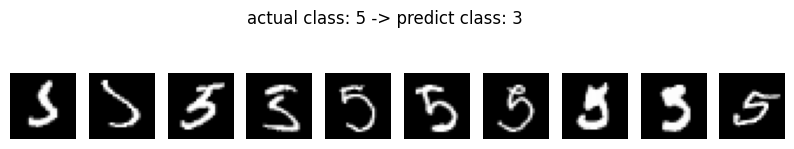

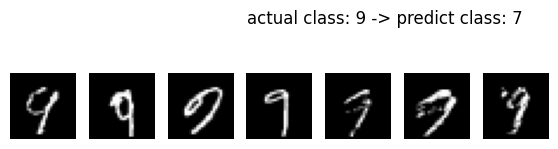

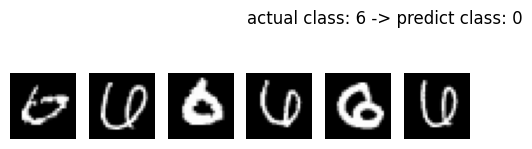

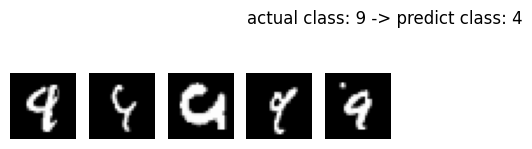

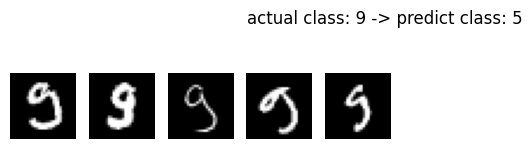

In [29]:
cm = confusion_matrix(y_test, y_pred_classes)

errors = {}
for i in range(10):
    for j in range(10):
        if i != j:
            errors[(i, j)] = cm[i, j]

top_5_errors = Counter(errors).most_common(5)
total_incorrect = np.where(y_pred_classes != y_test)[0]

print(f"\n잘못 예측된 데이터 개수: {len(total_incorrect)} \n")
print("잘못 예측된 클래스 상위 5개")

for (actual, predicted), count in top_5_errors:
    print(f"실제 클래스: {actual}, 잘못 예측된 클래스: {predicted}, 횟수: {count}")

for i, ((actual, predicted), count) in enumerate(top_5_errors):
    incorrect_indices = np.where((y_test == actual) & (y_pred_classes == predicted))[0]

    if len(incorrect_indices) > 0:
        plt.figure(figsize=(10, 2))
        plt.suptitle(f"actual class: {actual} -> predict class: {predicted}")
        for j, idx in enumerate(incorrect_indices[:10]):
            plt.subplot(1, 10, j + 1)
            plt.imshow(X_test_scaled[idx].reshape(28, 28), cmap='gray')
            plt.axis('off')
        plt.show()




<h1>모델 에러 분석</h1>
성능 평가에 따르면 5와 9 클래스에서 혼동 되는 패턴이 존재함을 알 수 있다. 잘못 예측된 클래스 상위 5개를 분석한 결과 클래스 9에서 잘못 예측되는 경향이 다수 관찰 되었으며 5를 3으로 혼동하거나 6을 0으로 혼동하기도 한다.

<h1>해결책</h1>
잘못 예측된 이미지를 보면, 특정 클래스가 다른 클래스와 모양적으로 매우 유사한 경우가 많은데 이를 해결하기 위해 데이터 증강을 통한 다양한 형태의 데이터를 추가하여 모델이 더 다양한 패턴을 학습할 수 있도록 한다.

###참고자료